<a href="https://colab.research.google.com/github/asabbah44/Text_Classification/blob/main/WordEmbeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://stackabuse.com/python-for-nlp-movie-sentiment-analysis-using-deep-learning-in-keras/

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
from bs4 import BeautifulSoup
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/dataset.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/mydatasetfinal.csv')


df1 = pd.DataFrame(df1, columns = ['commenttext','label'])
df2 = pd.DataFrame(df2, columns = ['commenttext','label'])

# df2_skip_req=df2[df2.label=='Requirement']

# df2=df2.drop(df2_skip_req.index)

df=pd.concat([df1,df2])
df_skip_req=df[df.label=='Requirement']
df=df.drop(df_skip_req.index)
#df=pd.concat([df1,df2])

# df=df.dropna()

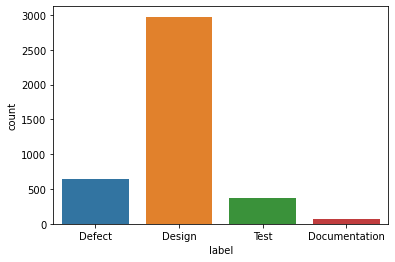

In [ ]:
import seaborn as sns

sns.countplot(x='label', data=df)

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # """
    #     text: a string
        
    #     return: modified initial string
    # """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text

    Cust_words = []
    stop = set(stopwords.words('english'))
    for word in  Cust_words:
        STOPWORDS.add(word)
    text = ' '.join(word for word in text.split() if word not in stop)

    return text
    
df['commenttext'] = df['commenttext'].apply(clean_text)
df1['commenttext'] = df1['commenttext'].apply(clean_text)
df2['commenttext'] = df2['commenttext'].apply(clean_text)


In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = sen
    

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
# TAG_RE = re.compile(r'<[^>]+>')

# def remove_tags(text):
#     return TAG_RE.sub('', text)

In [ ]:
!pip install pyspellchecker


     |████████████████████████████████| 2.7MB 8.4MB/s 


In [ ]:
X = df.commenttext
# sentences = list(df['commenttext'])
# for sen in sentences:
#     c=preprocess_text(sen)
#     X.append(c)


# df1_design = df1[df1.label=='Requirement']
# df1=df1.drop(df1_design.index)
# df1_design = df1[df1.label=='Design']
# df1=df1.drop(df1_design.index)
X1 = df1['commenttext']
# sentences1 = list(df1['commenttext'])
# for sen in sentences1:
#     c=preprocess_text(sen)
#     X1.append(c)

X2 = df2['commenttext']
# sentences2 = list(df2['commenttext'])
# for sen in sentences2:
#     c=preprocess_text(sen)
#     X2.append(c)
  

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

from Utility import preprocess
df["commenttext"] = df["commenttext"].apply(lambda x: x.lower())
df1["commenttext"] = df1["commenttext"].apply(lambda x: x.lower())
df2["commenttext"] = df2["commenttext"].apply(lambda x: x.lower())

# # Clean the text
df["commenttext"] = df["commenttext"].apply(lambda x:preprocess.clean_text(x))
df1["commenttext"] = df1["commenttext"].apply(lambda x:preprocess.clean_text(x))
df2["commenttext"] = df2["commenttext"].apply(lambda x:preprocess.clean_text(x))

# # Clean numbers
df["commenttext"] = df["commenttext"].apply(lambda x:preprocess.clean_numbers(x))
df1["commenttext"] = df1["commenttext"].apply(lambda x:preprocess.clean_numbers(x))
df2["commenttext"] = df2["commenttext"].apply(lambda x:preprocess.clean_numbers(x))
# # Clean Contractions
df["commenttext"] = df["commenttext"].apply(lambda x:preprocess.replace_contractions(x))
 
# df["commenttext"] = df["commenttext"].apply(lambda x:preprocess.clean_punc(x))

# # lemmatize
df["commenttext"] = df["commenttext"].apply(lambda x: preprocess.lemmatize(x))
df1["commenttext"] = df1["commenttext"].apply(lambda x: preprocess.lemmatize(x))
df2["commenttext"] = df2["commenttext"].apply(lambda x: preprocess.lemmatize(x))
# # remove stop word and custome word such as todo
# df["commenttext"] = df["commenttext"].apply(lambda x: preprocess.custm_stopwords_remove(x))



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Label encoder

In [ ]:
df.label.unique()

array(['Defect', 'Design', 'Test', 'Documentation'], dtype=object)

In [ ]:
y = df.label

y = np.array(list(map(lambda x: 0 if x=="Requirement" else 1 if x=="Design" else 2 if x=="Defect" else 3 if x=="Test" else 4, y)))

y1 = df1['label']

y1 = np.array(list(map(lambda x: 0 if x=="Requirement" else 1 if x=="Design" else 2 if x=="Defect" else 3 if x=="Test" else 4, y1)))

y2 = df2['label']

y2 = np.array(list(map(lambda x: 0 if x=="Requirement" else 1 if x=="Design" else 2 if x=="Defect" else 3 if x=="Test" else 4, y2)))


In [ ]:
y

array([2, 2, 2, ..., 2, 2, 1])

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.1,random_state=42)

# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.1,random_state=42)

# X_train=np.append(X_train1,X_train2)
# y_train=np.append(y_train1,y_train2)
# X_test=np.append(X_test2,X_test1)
# y_test=np.append(y_test2,y_test1)



# X_train, X_test_skip, y_train, y_test_skip = train_test_split(X, y, test_size=0.2)



In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train.values)
# y_test = le.transform(y_test.values)

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
all_words = []
for sent in X:
    tokenize_word = word_tokenize(sent)
    for word in tokenize_word:
        all_words.append(word)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
unique_words = set(all_words)

No_Of_Words=(len(unique_words))
print(len(all_words))

50089


In [ ]:
No_Of_Words

7079

In [ ]:
tokenizer = Tokenizer(num_words=No_Of_Words)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(df.commenttext, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
print(length_long_sentence)

470


In [ ]:
length_long_sentence=150

In [ ]:
MaxWordsLen=length_long_sentence

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

# max number of words in sentencecs
maxlen = MaxWordsLen

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)



In [ ]:
vocab_size 

6177

Chose which model to use

In [ ]:
# 1- Glove , 2- W2v , 3- SEW2v (200 Dim),   4- Fasttext
model_type=  2
EMBEDDING_DIM=300

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
import gensim
from gensim import corpora, models, similarities

embeddings_dictionary = dict()
if(model_type==1) :

 glove_file = open('/content/drive/MyDrive/Colab Notebooks/glove.840B.300d.txt', encoding="utf8")

 for line in glove_file:
    records = line.split(" ")
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
 glove_file.close()

elif (model_type==2):
 w2v_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/GoogleNews-vectors-negative300.bin.gz', binary=True)
 word_vectors = w2v_model
 word_index = tokenizer.word_index
 for word, i in word_index.items():
    if i>=No_Of_Words:
        continue
    try:
        embedding_vector = word_vectors[word]
        embeddings_dictionary[word] = embedding_vector
    except KeyError:
      continue
      #  embeddings_dictionary[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

 del(word_vectors)

elif (model_type==3):
 w2v_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/SO_vectors_200.bin', binary=True)
 word_vectors = w2v_model
 word_index = tokenizer.word_index
 for word, i in word_index.items():
    if i>=No_Of_Words:
        continue
    try:
        embedding_vector = word_vectors[word]
        embeddings_dictionary[word] = embedding_vector
    except KeyError:
      continue
      #  embeddings_dictionary[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

 del(word_vectors)

elif (model_type==4):
       !pip install tqdm
       from gensim.models.wrappers import FastText
       from tqdm import tqdm
       print('loading FastText word embeddings...')
       embeddings_index = {}
       f = open('/content/drive/MyDrive/Colab Notebooks/crawl-300d-2M.vec',encoding='utf-8')
       for line in tqdm(f):
        values = line.strip().rsplit(' ')
        word = values[0]
        vector_dimensions = np.asarray(values[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions
       f.close()
else:
   print("No Model")

In [ ]:
WordsNotInclude=[]
embedding_matrix = zeros((vocab_size,  EMBEDDING_DIM))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
    else : WordsNotInclude.append(word)

In [ ]:
len(WordsNotInclude)

2409

In [ ]:
print(embeddings_dictionary.get(1))

None


In [ ]:
X_train

array([[   1,   56,  387, ...,    0,    0,    0],
       [  94, 2907,   26, ...,    0,    0,    0],
       [ 181,    3, 2910, ...,    0,    0,    0],
       ...,
       [ 427,    5,  206, ...,    0,    0,    0],
       [   1,   73,   20, ...,    0,    0,    0],
       [ 288,  576,  291, ...,    0,    0,    0]], dtype=int32)

ANN

In [ ]:
# model = Sequential()
# embedding_layer = Embedding(vocab_size, EMBEDDING_DIM,weights=[embedding_matrix] , input_length=maxlen , trainable=False)
# model.add(embedding_layer)

# model.add(Flatten())
# model.add(Dense(5, activation='softmax'))

In [ ]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# print(model.summary())

In [ ]:
# history = model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split=0.2)


In [ ]:
# from sklearn.metrics import classification_report

# y_pred = model.predict(X_test, batch_size=128, verbose=1)
# y_pred_bool = np.argmax(y_pred, axis=1)

# print(classification_report(y_test, y_pred_bool))

In [ ]:
# score = model.evaluate(X_test, y_test, verbose=1)

In [ ]:
# print("Test Score:", score[0])
# print("Test Accuracy:", score[1])

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])

# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train','test'], loc = 'upper left')
# plt.show()

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train','test'], loc = 'upper left')
# plt.show()

Simple CNN

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Embedding
model = Sequential()

embedding_layer = Embedding( vocab_size, EMBEDDING_DIM,weights=[embedding_matrix] ,input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(150, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(units=5, activation='softmax'))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 300)          1853100   
_________________________________________________________________
conv1d (Conv1D)              (None, 146, 150)          225150    
_________________________________________________________________
global_max_pooling1d (Global (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 755       
Total params: 2,079,005
Trainable params: 225,905
Non-trainable params: 1,853,100
_________________________________________________________________
None


In [ ]:
import time
from sklearn.metrics import classification_report
for i in range(0,3):
 history1 = model.fit(X_train, y_train, batch_size=512, epochs=10, verbose=0, validation_split=0.2 ,callbacks=[earlystopping])
 t0=time.clock()
 score = model.evaluate(X_test, y_test, verbose=1)
 print(" secand %.3f" % float(time.clock()-t0))

 t0=time.clock()
 y_pred = model.predict(X_test, batch_size=512, verbose=1)
 y_pred_bool = np.argmax(y_pred, axis=1)
 print(" secand %.3f" % float(time.clock()-t0))
 print(classification_report(y_test, y_pred_bool,digits=3))

26/26 [==============================] - 0s 5ms/step - loss: 0.4948 - acc: 0.8182


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


 secand 0.176


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


2/2 [==============================] - 0s 145ms/step
 secand 0.452
              precision    recall  f1-score   support

           1      0.816     0.973     0.888       602
           2      0.720     0.142     0.237       127
           3      0.873     0.849     0.861        73
           4      0.000     0.000     0.000        12

    accuracy                          0.818       814
   macro avg      0.602     0.491     0.496       814
weighted avg      0.794     0.818     0.771       814



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


26/26 [==============================] - 0s 3ms/step - loss: 0.4409 - acc: 0.8354
 secand 0.129
2/2 [==============================] - 0s 22ms/step
 secand 0.078
              precision    recall  f1-score   support

           1      0.838     0.963     0.896       602
           2      0.723     0.268     0.391       127
           3      0.889     0.877     0.883        73
           4      0.667     0.167     0.267        12

    accuracy                          0.835       814
   macro avg      0.779     0.569     0.609       814
weighted avg      0.822     0.835     0.807       814

26/26 [==============================] - 0s 3ms/step - loss: 0.4306 - acc: 0.8452
 secand 0.129
2/2 [==============================] - 0s 23ms/step
 secand 0.072
              precision    recall  f1-score   support

           1      0.850     0.960     0.902       602
           2      0.741     0.315     0.442       127
           3      0.880     0.904     0.892        73
           4      0.800 

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.4306280016899109
Test Accuracy: 0.8452088236808777


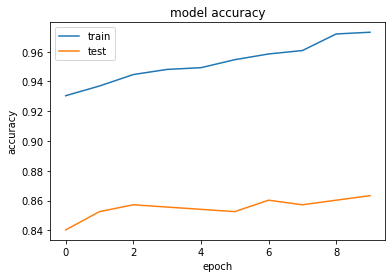

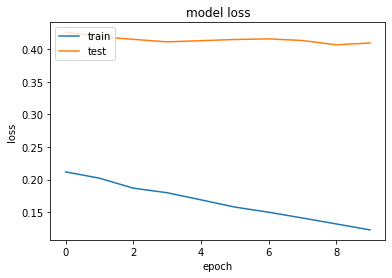

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

 CNN Functinal 

In [ ]:
# from keras.layers import Input
# from keras.models import Model
# Drop=0.2
# cnn_model = Sequential()
# embedding_layer = Embedding( vocab_size, EMBEDDING_DIM, weights=[embedding_matrix], input_length=maxlen , trainable=False)
# cnn_model.add(embedding_layer)
# cnn_model.add(Conv1D(filters = 150, kernel_size = 2, activation = "relu"))
# cnn_model.add(MaxPooling1D(pool_size = 1))
# cnn_model.add(Dropout(Drop))
# cnn_model.add(Conv1D(filters = 150, kernel_size = 3, activation = "relu"))
# cnn_model.add(MaxPooling1D(pool_size = 1))
# cnn_model.add(Dropout(Drop))
# cnn_model.add(Conv1D(filters = 150, kernel_size =4, activation = "relu"))
# cnn_model.add(GlobalMaxPooling1D())
# cnn_model.add(Dense(units = 150, activation = 'relu'))
# cnn_model.add(Dense(units = 5, activation = 'softmax'))


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
class TEXT_MODEL(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=5,
                 dropout_rate=0.1,
                 trainable=False,
                 weights=[embedding_matrix],
            

                
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocabulary_size,embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu",)
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        # self.cnn_layer4 = layers.Conv1D(filters=cnn_filters,
        #                                 kernel_size=5,
        #                                 padding="valid",
        #                                 activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        
        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
   
        
        concatenated = tf.concat([l_1,l_2,l_3], axis=-1) # (self.batch_size, 3 * self.cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output

In [ ]:
VOCAB_LENGTH = vocab_size
EMB_DIM = 300
CNN_FILTERS = 150
DNN_UNITS = 512
OUTPUT_CLASSES = 5

DROPOUT_RATE = 0.2

NB_EPOCHS = 10

In [ ]:
cnn_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

In [ ]:

#print(cnn_model.summary())

In [ ]:
#Configures the model for training
from sklearn.metrics import classification_report
from keras.optimizers import Adam
for i in range(0,4):
 cnn_model.compile(loss = "sparse_categorical_crossentropy", optimizer= "Adam", metrics = ["acc"])
 history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 12, validation_split=0.2 ,verbose=1)


 t0=time.clock()
 score = cnn_model.evaluate(X_test, y_test, verbose=1)
 print(" secand %.3f" % float(time.clock()-t0))

 t0=time.clock()
 y_pred = cnn_model.predict(X_test, batch_size=128, verbose=1)
 y_pred_bool = np.argmax(y_pred, axis=1)
 print(" secand %.3f" % float(time.clock()-t0))
 print(classification_report(y_test, y_pred_bool,digits=3))

Epoch 1/12
6/6 [==============================] - 2s 150ms/step - loss: 0.0344 - acc: 0.9923 - val_loss: 0.7167 - val_acc: 0.8571
Epoch 2/12
6/6 [==============================] - 1s 118ms/step - loss: 0.0179 - acc: 0.9973 - val_loss: 0.8342 - val_acc: 0.8479
Epoch 3/12
6/6 [==============================] - 1s 118ms/step - loss: 0.0100 - acc: 0.9981 - val_loss: 0.8744 - val_acc: 0.8387
Epoch 4/12
6/6 [==============================] - 1s 116ms/step - loss: 0.0058 - acc: 0.9985 - val_loss: 0.9577 - val_acc: 0.8510
Epoch 5/12
6/6 [==============================] - 1s 119ms/step - loss: 0.0048 - acc: 0.9988 - val_loss: 1.0113 - val_acc: 0.8449
Epoch 6/12
6/6 [==============================] - 1s 117ms/step - loss: 0.0040 - acc: 0.9985 - val_loss: 1.0553 - val_acc: 0.8495
Epoch 7/12
6/6 [==============================] - 1s 119ms/step - loss: 0.0034 - acc: 0.9988 - val_loss: 1.1127 - val_acc: 0.8525
Epoch 8/12
6/6 [==============================] - 1s 118ms/step - loss: 0.0033 - acc: 0.99

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


7/7 [==============================] - 0s 7ms/step
 secand 0.153
              precision    recall  f1-score   support

           1      0.864     0.963     0.911       602
           2      0.762     0.378     0.505       127
           3      0.904     0.904     0.904        73
           4      0.571     0.333     0.421        12

    accuracy                          0.857       814
   macro avg      0.775     0.645     0.685       814
weighted avg      0.848     0.857     0.840       814

Epoch 1/12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()


6/6 [==============================] - 1s 144ms/step - loss: 0.0061 - acc: 0.9992 - val_loss: 1.1124 - val_acc: 0.8341
Epoch 2/12
6/6 [==============================] - 1s 117ms/step - loss: 0.0059 - acc: 0.9985 - val_loss: 1.1482 - val_acc: 0.8341
Epoch 3/12
6/6 [==============================] - 1s 118ms/step - loss: 0.0046 - acc: 0.9992 - val_loss: 1.1703 - val_acc: 0.8433
Epoch 4/12
6/6 [==============================] - 1s 116ms/step - loss: 0.0042 - acc: 0.9992 - val_loss: 1.1079 - val_acc: 0.8310
Epoch 5/12
6/6 [==============================] - 1s 118ms/step - loss: 0.0045 - acc: 0.9988 - val_loss: 1.1823 - val_acc: 0.8571
Epoch 6/12
6/6 [==============================] - 1s 117ms/step - loss: 0.0069 - acc: 0.9992 - val_loss: 1.0749 - val_acc: 0.8372
Epoch 7/12
6/6 [==============================] - 1s 117ms/step - loss: 0.0040 - acc: 0.9992 - val_loss: 1.0817 - val_acc: 0.8280
Epoch 8/12
6/6 [==============================] - 1s 120ms/step - loss: 0.0036 - acc: 0.9992 - val_lo

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5262981057167053
Test Accuracy: 0.8439803719520569


In [ ]:
pip install scikit-plot

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_y = le.fit_transform(y_train)
test_y = le.transform(y_test)

In [ ]:

import scikitplot as skplt
y_true = [le.classes_[x] for x in y_test]
y_pred = [le.classes_[x] for x in y_pred_bool]
skplt.metrics.plot_confusion_matrix(
    y_true, 
    y_pred,
    figsize=(12,12),x_tick_rotation=90)

IndexError: ignored

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()